In [44]:
import os
import numpy as np
import pandas as pd

In [45]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, regularizers

In [46]:
from tensorflow import keras

In [59]:
# directory = 'modified_data/'
# like_samples = []
# dislike_samples = []
# labels = []
# for filename in os.scandir(directory):
#     data = pd.read_csv(filename.path)
#     if (data["label"][0] == 'Like'):
#         labels.append(0)
#         like_samples.append(data.drop(['label'] , axis = 1))
#     else:
#         labels.append(1)
#         dislike_samples.append(data.drop(['label'] , axis = 1))
    
directory = 'modified_data/'
samples = []
labels = []
for filename in os.scandir(directory):
    data = pd.read_csv(filename.path)
    samples.append(data.drop(['label'] , axis = 1))
    if (data["label"][0] == 'Like'):
        labels.append(0)
    else:
        labels.append(1)
    

In [64]:
samples = np.array(samples)
labels = np.array(labels)

In [49]:
like_samples = np.array(like_samples)
dislike_samples = np.array(dislike_samples)

In [50]:
print(like_samples.shape , dislike_samples.shape)

(461, 512, 14) (584, 512, 14)


In [51]:
train_like_size = int(len(like_samples) * 0.7)
# test_like_size = len(like_labels) - train_like_size

train_dislike_size = int(len(dislike_samples) * 0.7)
# test_dislike_size =len(dislike_labels)  - train_dislike_size

In [52]:
print(train_like_size )
print(train_dislike_size)

322
408


In [53]:

# Use stratified sampling to randomly select samples for the train and test sets
X_train_like, X_test_like, y_train_like, y_test_like = train_test_split(
   like_samples, [i for i in labels if i == 0],
    train_size=train_like_size )
 
X_train_dislike, X_test_dislike, y_train_dislike, y_test_dislike = train_test_split(
    dislike_samples, [i for i in labels if i == 1] , 
    train_size = train_dislike_size)

# Combine the selected samples to form the train and test sets
X_train = np.concatenate((X_train_like, X_train_dislike))
X_test = np.concatenate((X_test_like, X_test_dislike))
y_train = np.concatenate((y_train_like, y_train_dislike))
y_test = np.concatenate((y_test_like, y_test_dislike))



In [11]:
# X_train = np.concatenate((like_samples[41:], dislike_samples[42:]))
# X_test = np.concatenate((like_samples[:41], dislike_samples[:42]))
# y_train = np.concatenate(([0]*420, [1] * 542))
# y_test = np.concatenate(([0]*41, [1] * 42))

# save train and test data

In [12]:
# np.save('training-testing-data/testing/test_data', X_test, allow_pickle=True, fix_imports=True)
# np.save('training-testing-data/testing/test_label', y_test, allow_pickle=True, fix_imports=True)

# np.save('training-testing-data/training/train_data', X_train, allow_pickle=True, fix_imports=True)
# np.save('training-testing-data/training/train_label', y_train, allow_pickle=True, fix_imports=True)


In [13]:
# Set input shape for CNN

input_shape = (512,14,1)

# Define CNN model architecture
model = Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu' , input_shape = input_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

# model.add(Dropout(0.3))
# model.add(Dense(164, activation='relu'))
# model.add(Dropout(0.3))

# model.add(Dense(164, activation='relu'))
# model.add(Dropout(0.3))

model.add(Dense(164, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))
# model.add(Dense(uni(ts=1, activation='sigmoid'))

In [14]:

model.compile(keras.optimizers.Adam(learning_rate = 0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(X_train , y_train , epochs = 50 , batch_size = 16)

Epoch 1/50
46/46 [==============================] - 5s 97ms/step - loss: 1.3696 - accuracy: 0.5507
Epoch 2/50
46/46 [==============================] - 5s 100ms/step - loss: 0.6663 - accuracy: 0.6849
Epoch 3/50
46/46 [==============================] - 4s 86ms/step - loss: 0.4456 - accuracy: 0.7877
Epoch 4/50
46/46 [==============================] - 4s 86ms/step - loss: 0.3863 - accuracy: 0.8288
Epoch 5/50
46/46 [==============================] - 4s 85ms/step - loss: 0.2638 - accuracy: 0.8890
Epoch 6/50
46/46 [==============================] - 4s 87ms/step - loss: 0.2209 - accuracy: 0.9164
Epoch 7/50
46/46 [==============================] - 4s 86ms/step - loss: 0.1533 - accuracy: 0.9411
Epoch 8/50
46/46 [==============================] - 4s 87ms/step - loss: 0.1548 - accuracy: 0.9397
Epoch 9/50
46/46 [==============================] - 5s 99ms/step - loss: 0.1252 - accuracy: 0.9562
Epoch 10/50
46/46 [==============================] - 5s 119ms/step - loss: 0.1180 - accuracy: 0.9589
Epoch 1

In [25]:
model.evaluate(X_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [43]:
!pip install foolbox

In [31]:
y_pred=[]

for data in X_test:
    y_pred.append(np.argmax(model.predict(np.array([data , ]))))

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


# evaluate Model

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

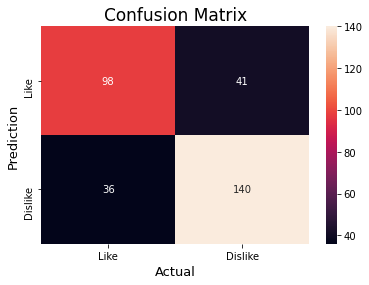

In [33]:
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Like','Dislike'],
            yticklabels=['Like','Dislike'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [34]:
accuaracy = (cm[0][0] + cm[1][1]) / X_test.shape[0] *100
recall = (cm[0][0]) /(cm[0][0] + cm[1][0]) *100
precision = (cm[0][0]) /(cm[0][0] + cm[0][1]) *100
f1_score = (2*recall*precision)/(recall + precision)

In [35]:
print('Accuracy: ' , accuaracy)
print('Precision: ' , precision)
print('Recall: ' , recall)
print('F1 SCore: ' , f1_score)

Accuracy:  75.55555555555556
Precision:  70.50359712230215
Recall:  73.13432835820896
F1 SCore:  71.7948717948718


# save model

In [21]:
model.save('models/modified_data_single_fold')

INFO:tensorflow:Assets written to: models/modified_data_single_fold\assets


INFO:tensorflow:Assets written to: models/modified_data_single_fold\assets


# load model

In [56]:
model = tf.keras.models.load_model('models/modified_data_single_fold//')

# Check its architecture
# new_model.summary()

In [66]:
# model.evaluate((np.concatenate((X_train,X_test))),np.concatenate((y_train,y_test)))
model.evaluate(samples,labels)

33/33 [==============================] - 1s 44ms/step - loss: 0.2383 - accuracy: 0.9263


[0.23828691244125366, 0.9263157844543457]

In [68]:
import tensorflow as tf
import foolbox



# Convert the TensorFlow model to a Foolbox model
fmodel = foolbox.models.TensorFlowModel(model, bounds=(0, 255))
#normalize samples
samples = samples/255.0
# Select the attack method (FGSM)
attack = foolbox.attacks.FGSM()

# Define the epsilon value for the attack
epsilons = [0.1]  # Adjust the epsilon value based on your requirements

# Generate adversarial examples
adversarials = attack(fmodel,samples, labels, epsilons=epsilons)

# Evaluate the attack success
predictions = np.argmax(fmodel.predictions(adversarials), axis=1)
accuracy = np.sum(predictions ==labels) / len(labels)
print("Attack success rate: {:.2f}%".format(accuracy * 100))


AssertionError: 

In [78]:
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import TensorFlowV2Classifier



# Create an ART classifier wrapper for the model
classifier = TensorFlowV2Classifier(model=model, 
                                    input_shape=(512, 14, 1), 
                                    nb_classes=2, 
                                    loss_object=tf.keras.losses.SparseCategoricalCrossentropy())

# Select the attack method (FGSM)
attack = FastGradientMethod(estimator=classifier, eps=0.1)

# Generate adversarial examples
x_test_adv = attack.generate(samples)

# Evaluate the attack success
predictions = np.argmax(classifier.predict(x_test_adv), axis=1)
accuracy = np.sum(predictions == labels) / len(labels)
print("Attack success rate: {:.2f}%".format(accuracy * 100))


Attack success rate: 55.89%
